In [62]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.utils import plot_model

In [75]:
# Create naive inception block ( it does not have the filter reduction conv2D 1x1)

def naive_inception_module(layer_in, f1, f2, f3):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  print(type(conv1))
  # 3x3 conv
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
  print(type(conv3))
  # 5x5 conv
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
  print(type(conv5))
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  print(type(pool))
  # concatenation of filters
  concat = Concatenate()([conv1, conv3, conv5, pool])
  layer_out = concat
  return layer_out

# Create an optimized form of the inception block

# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = Concatenate()([conv1, conv3, conv5, pool])
	return layer_out


<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
Model: "functional_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 256, 256, 64) 256         input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_85 (Conv2D)              (None, 256, 256, 128 3584        input_29[0][0]                   
_________________________________________________________________________________________

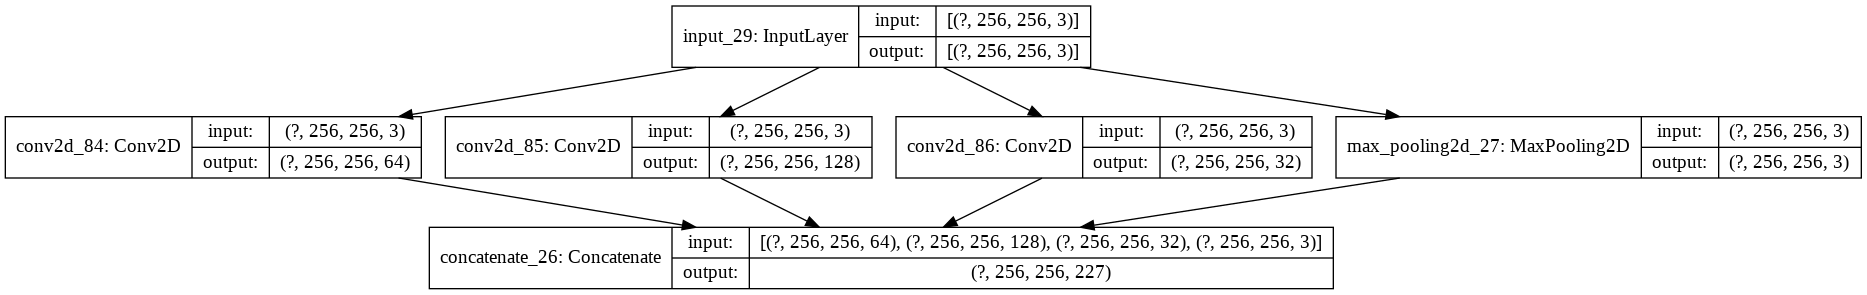

In [74]:
#Naive inception module

# define model input
visible = Input(shape=(256,256,3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True)

Model: "functional_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 256, 256, 96) 384         input_32[0][0]                   
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 256, 256, 16) 64          input_32[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 256, 256, 3)  0           input_32[0][0]                   
______________________________________________________________________________________

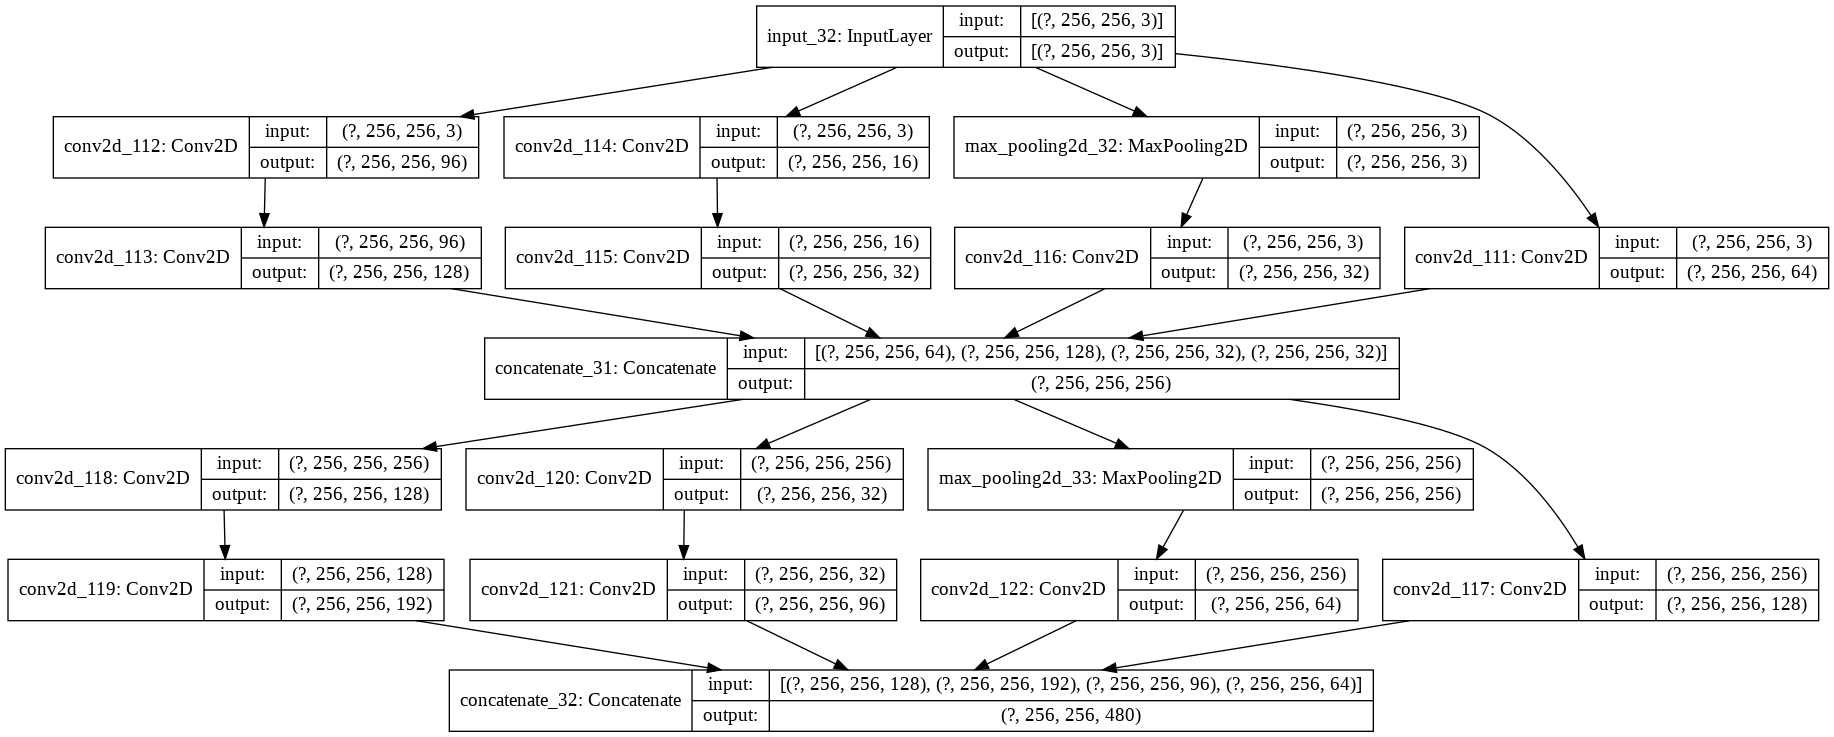

In [78]:
# Inception Module with optimization

visible = Input(shape=(256, 256, 3))

# Add Inception Block
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
#Create Module
model = Model(inputs=visible, outputs=layer)
model.summary()
plot_model(model, show_shapes=True)